# House price estimate

### Importing libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

### Reading csv

In [28]:
# بارگذاری داده‌ها از فایل CSV
df = pd.read_csv('/content/housePrice.csv')

### Fix data type & Delete outlier data

In [29]:
df['Area'] = df['Area'].str.replace(',', '').astype(int)
df['Price'] = df['Price'].replace(',', '').astype(float)
df['Price(USD)'] = df['Price(USD)'].replace(',', '').astype(float)
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)
df['Address'] = df['Address'].astype(str)

In [30]:
df = df[(df['Area'] <= 300)]

df['Area'].describe()

count    3412.000000
mean      100.297773
std        45.334780
min        30.000000
25%        68.000000
50%        90.000000
75%       120.000000
max       300.000000
Name: Area, dtype: float64

### Data histogram

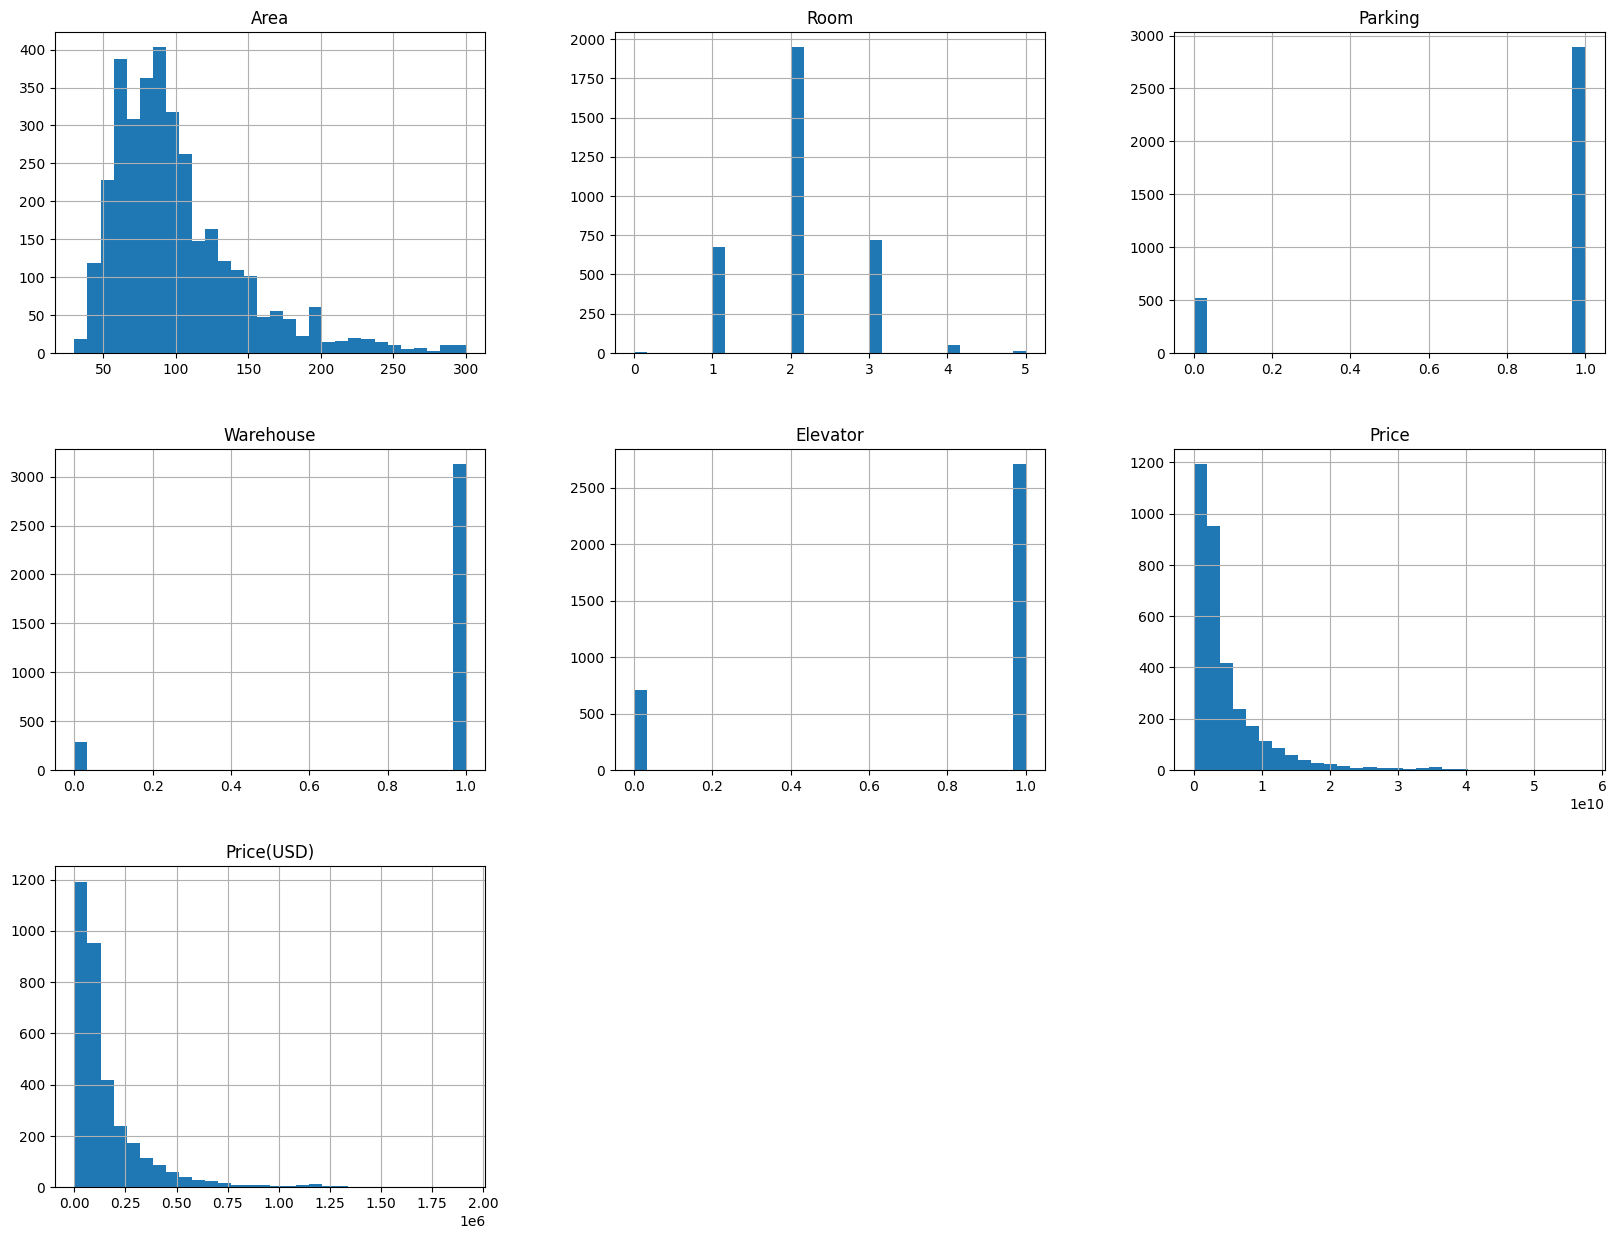

In [31]:
# رسم هیستوگرام برای هر ویژگی
df.hist(bins=30, figsize=(20, 15))
plt.show()

### Create a price per meter

In [32]:
df['p/m'] = df['Price(USD)'] / df['Area']

### Correlation

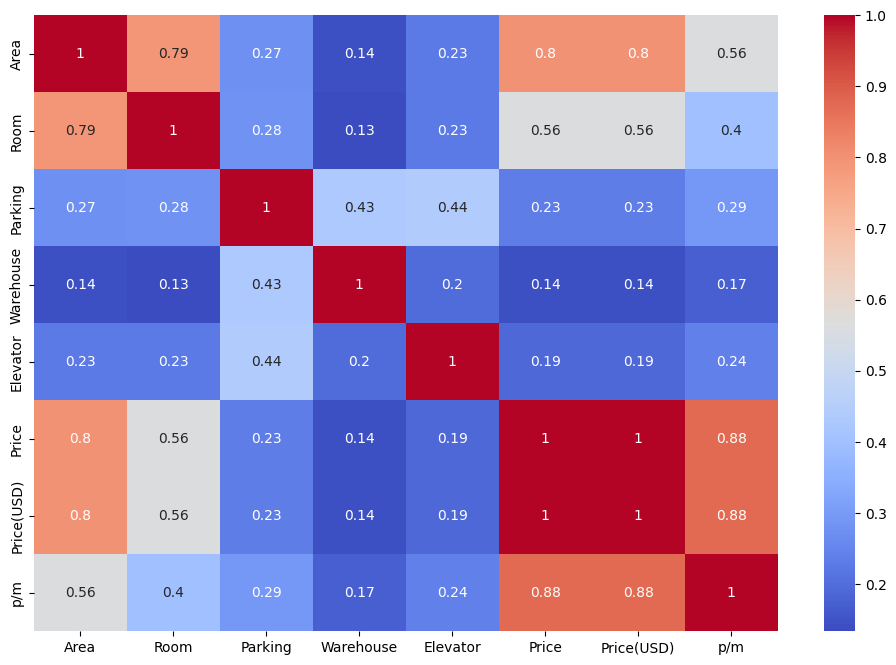

In [33]:
# رسم ماتریس همبستگی
df = df.drop('Address', axis=1)
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

حذف ردیف انباری بدلیل همبستگی کم

In [34]:
df = df.drop('Warehouse', axis=1)

## Build models

### Multiple linear model

In [35]:
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(df[['Area','Room', 'Parking', 'Elevator', 'p/m']].values,df['Price'].values, test_size=0.2)

# ایجاد و آموزش مدل رگرسیون خطی
model = LinearRegression().fit(x_train, y_train)

# پیش‌بینی با مدل
y_predicted = model.predict(x_test)

# محاسبه و چاپ R^2 و واریانس
print('R^2_score: %.2f' % r2_score(y_test, y_predicted))
print('variance score: %.2f' % math.sqrt(np.mean((y_predicted - y_test)**2)))

R^2_score: 0.91
variance score: 1803256903.43


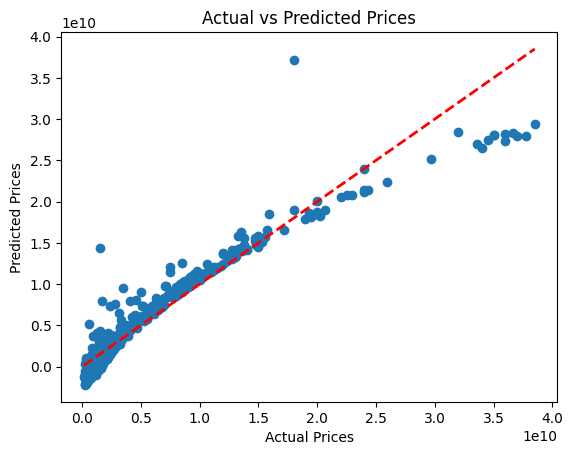

In [36]:
plt.scatter(y_test, y_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Non-linear logarithm regression

beta_1 = 0.130981, beta_2 = 0.476345
MSE: 0.0058
RMSE: 0.0760
MAE: 0.0556
R^2: 0.7740


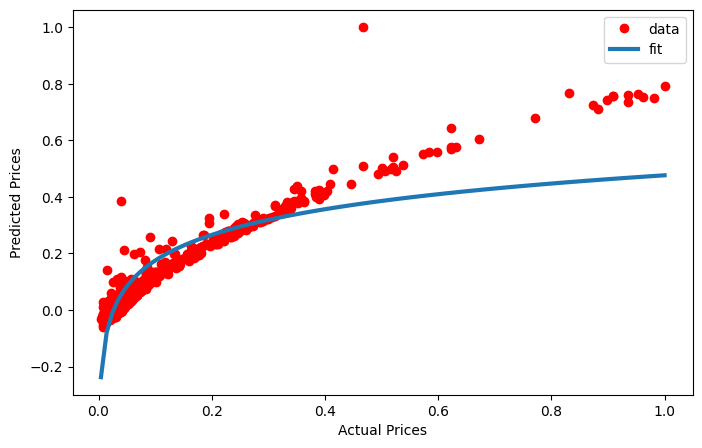

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# تابع log برای برازش
def log(x, beta_1, beta_2):
    return beta_1 * np.log(x) + beta_2

# برازش تابع log به داده‌ها
xdata = y_test / np.max(y_test)
ydata = y_predicted / np.max(y_predicted)
popt, pcov = curve_fit(log, xdata, ydata)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# پیش‌بینی براساس تابع برازش شده
y_fitted = log(xdata, *popt)

# محاسبه خطاها
mse = mean_squared_error(ydata, y_fitted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ydata, y_fitted)
r2 = r2_score(ydata, y_fitted)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

# رسم نتایج
plt.figure(figsize=(8, 5))
plt.plot(xdata, ydata, 'ro', label='data')
x = np.linspace(min(xdata), max(xdata), 100)
y = log(x, *popt)
plt.plot(x, y, linewidth=3, label='fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='best')
plt.show()

## quadratic nonlinear regression

a = -1.074843, b = 1.955881, c = -0.016053
MSE: 0.0006
RMSE: 0.0251
MAE: 0.0171
R^2: 0.9766


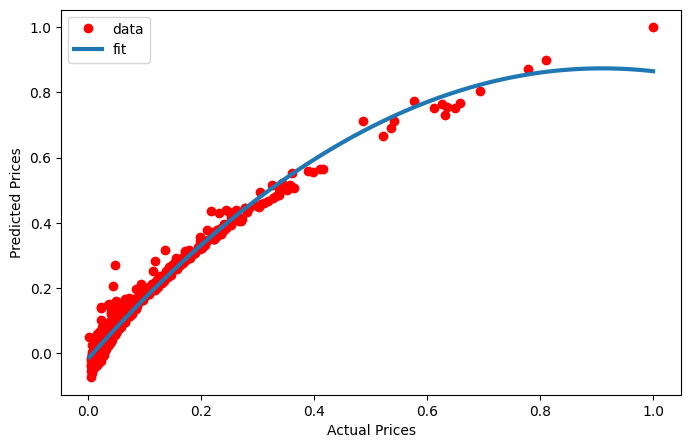

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# تابع چندجمله‌ای درجه دو برای برازش
def poly2(x, a, b, c):
    return a * x**2 + b * x + c

# برازش تابع چندجمله‌ای درجه دو به داده‌ها
popt, pcov = curve_fit(poly2, xdata, ydata)
print("a = %f, b = %f, c = %f" % (popt[0], popt[1], popt[2]))

# پیش‌بینی براساس تابع برازش شده
y_fitted = poly2(xdata, *popt)

# محاسبه خطاها
mse = mean_squared_error(ydata, y_fitted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ydata, y_fitted)
r2 = r2_score(ydata, y_fitted)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

# رسم نتایج
plt.figure(figsize=(8, 5))
plt.plot(xdata, ydata, 'ro', label='data')
x = np.linspace(min(xdata), max(xdata), 100)
y = poly2(x, *popt)
plt.plot(x, y, linewidth=3, label='fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='best')
plt.show()


## Third order non-linear regression

a = 0.446089, b = -1.207552, c = 1.577274, d = -0.028961
MSE: 0.0012
RMSE: 0.0340
MAE: 0.0176
R^2: 0.9546


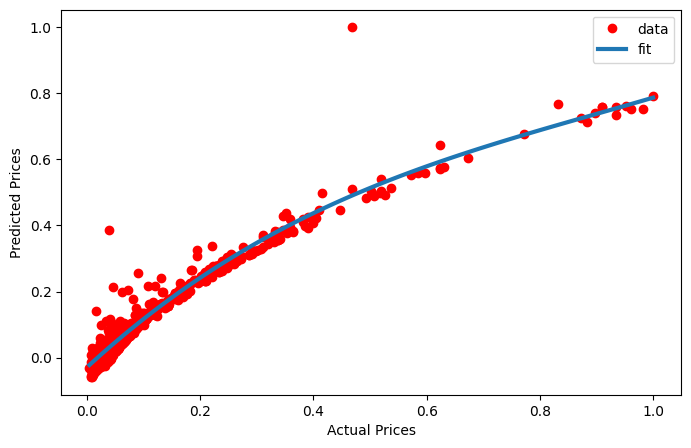

In [40]:
# تابع چندجمله‌ای درجه سه برای برازش
def poly3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, pcov = curve_fit(poly3, xdata, ydata)
print("a = %f, b = %f, c = %f, d = %f" % (popt[0], popt[1], popt[2], popt[3])) # Changed poppt to popt

# پیش‌بینی براساس تابع برازش شده
y_fitted = poly3(xdata, *popt)

# محاسبه خطاها
mse = mean_squared_error(ydata, y_fitted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ydata, y_fitted)
r2 = r2_score(ydata, y_fitted)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

# رسم نتایج
plt.figure(figsize=(8, 5))
plt.plot(xdata, ydata, 'ro', label='data')
x = np.linspace(min(xdata), max(xdata), 100)
y = poly3(x, *popt)
plt.plot(x, y, linewidth=3, label='fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='best')
plt.show()